<a href="https://colab.research.google.com/github/wdon021/Comp261_A5/blob/master/Comp421_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# create bivariate normaldistribution

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math
from mpl_toolkits import mplot3d
import pandas as pd
from sklearn.model_selection import train_test_split
%matplotlib inline

In [3]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from tensorflow import keras
import keras.backend as kb
import tensorflow as tf
from tensorflow.keras import layers
import datetime

In [30]:
from numpy import linalg as LA

In [4]:
mean = [0, 0]
cov = [[1, 0],
       [0, 1]]

In [80]:
united = np.random.multivariate_normal(mean, cov, 4000)

In [66]:
def same_kernel(X, lam):
  Kernel_matrix = [np.exp(-np.square(LA.norm(np.delete(X[i]-X, obj=i,axis=0), axis=1))/lam) for i in range(len(X))]
  double_sum = np.sum(Kernel_matrix)
  final = double_sum/(len(X)*(len(X)-1))
  return final

def dif_kernel(X,Y, lam):
  kernel_maxtrix = [np.exp(-np.square(LA.norm((X[i]-Y), axis=1)) /lam) for i in range(len(X))]
  double_sum = np.sum(kernel_maxtrix)
  final = double_sum/(len(X)*(len(Y)))
  return final


In [72]:
def same_kernel(X, lam):
  Kernel_matrix = [np.exp(-np.square(LA.norm(np.delete(X[i]-X, obj=i,axis=0), axis=1))/lam) for i in range(len(X))]
  double_sum = tf.reduce_sum(Kernel_matrix)
  final = double_sum/(len(X)*(len(X)-1))
  return final

In [106]:
def same_kernels(X, lamb):
  return (tf.reduce_sum([tf.exp(-tf.square(tf.norm(X[i]-X, ord='euclidean', axis=1))/lamb) for i in range(len(X))])-len(X))/(len(X)*(len(X)-1))

In [112]:
z1 = tf.expand_dims(united, 0)
z2 = tf.expand_dims(united, 1)

In [113]:
(tf.reduce_sum(tf.exp(-tf.reduce_sum(tf.math.squared_difference(z1, z2),axis= -1)/2))-len(united))/(len(united)*(len(united)-1))

<tf.Tensor: shape=(), dtype=float64, numpy=0.33170381171753033>

In [111]:
same_kernels(united, 2)

<tf.Tensor: shape=(), dtype=float64, numpy=0.33170381171753033>

In [91]:
dif_kernel(united, data,2)

0.42035125447309457

In [81]:
same_kernel(united, 2)

<tf.Tensor: shape=(), dtype=float64, numpy=0.33170381171753033>

In [82]:
same_kernel(united, 2)

<tf.Tensor: shape=(), dtype=float64, numpy=0.33170381171753033>

In [79]:
(tf.reduce_sum([tf.exp(-tf.square(tf.norm(united[i]-united, axis=1))/2) for i in range(len(united))])-100)/(len(united)*(len(united)-1))

<tf.Tensor: shape=(), dtype=float64, numpy=0.3530336311646113>

In [55]:
np.sum(np.sum([np.exp(-np.square(LA.norm(np.delete(united[i]-united, obj=i,axis=0), axis=1))/2) for i in range(len(united))],axis=1))/(len(united)*(len(united)-1))

0.3530336311646113

In [52]:
np.sum(np.exp(-np.square(LA.norm((united[0]-united)[1:], axis=1))/2))

21.320639680540946

In [6]:
x11, x22 = united.T

In [83]:
n = 4000
xy_min = [0, 0]
xy_max = [1, 1]
data = np.random.uniform(low = xy_min, high = xy_max, size=(n, 2))

In [84]:
same_kernel(data, 2)

<tf.Tensor: shape=(), dtype=float64, numpy=0.8554267620713089>

In [62]:
np.sum([np.exp(-np.square(LA.norm((united[i]-data), axis=1)) /2) for i in range(len(united))]

[array([0.23618596, 0.16777862, 0.22082352, ..., 0.16375357, 0.19623742,
        0.07950377]),
 array([0.54294265, 0.76893426, 0.73804035, ..., 0.30092037, 0.42765357,
        0.40908426]),
 array([0.01874541, 0.11981694, 0.06167206, ..., 0.00482147, 0.01107334,
        0.03504671]),
 array([0.81524049, 0.81109286, 0.88939765, ..., 0.57078474, 0.70998384,
        0.58509792]),
 array([0.78904745, 0.89625672, 0.89753246, ..., 0.60039954, 0.73497374,
        0.97200413]),
 array([0.72421149, 0.33876166, 0.50257574, ..., 0.77588467, 0.7469953 ,
        0.37363147]),
 array([0.55656026, 0.65127027, 0.63175695, ..., 0.45274221, 0.54207647,
        0.8964655 ]),
 array([0.12672035, 0.40126573, 0.26300588, ..., 0.05718278, 0.09703974,
        0.28949503]),
 array([0.25873665, 0.2885583 , 0.27796836, ..., 0.24138403, 0.27252118,
        0.5708966 ]),
 array([0.02942684, 0.14192992, 0.07766081, ..., 0.01101513, 0.02114836,
        0.09422157]),
 array([0.51265045, 0.29064508, 0.37398859, ..., 0

In [8]:
y11, y22 = data.T

In [9]:
def normal_cdf(x):
  q = math.erf(x/math.sqrt(2.0))
  return (1.0+q) /2.0
y11 = [normal_cdf(s) for s in x11]
y22 = [normal_cdf(s) for s in x22]

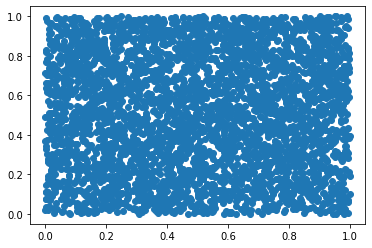

In [10]:
fig = plt.figure()
ax = plt.axes()
ax.plot(y11, y22, 'o')

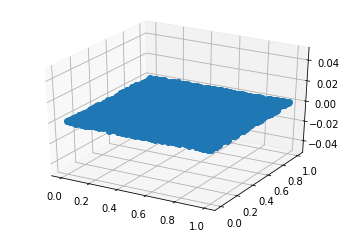

In [11]:
fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.plot3D(y11, y22, 'o')

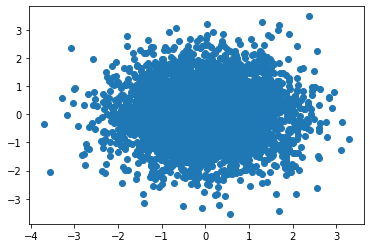

In [12]:
fig = plt.figure()
ax = plt.axes()
ax.plot(x11,x22, 'o')

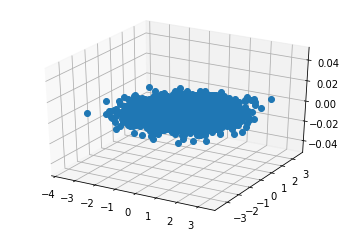

In [13]:
fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.plot3D(x11, x22, 'o')

In [ ]:
 for v in united:
   print(v*v.T)

In [16]:
trnorms1 = np.mat([(v*v.T)[0,0] for v in united]).T

IndexError: ignored

In [ ]:
def compute_Kernel(X1, Y1, width):
  

In [ ]:
gd1 = euclidean_norm(united)

In [ ]:
len(gd1)

4000

In [ ]:
united[1:]

array([[ 0.91439771,  1.01717643],
       [ 1.03153987,  0.76920659],
       [ 1.24475683, -1.04029424],
       ...,
       [-0.92915319, -1.15814591],
       [ 0.45012303,  1.57604183],
       [-1.04704763,  0.29997781]])

In [ ]:
united[:-1]

array([[ 0.86027174, -0.9725258 ],
       [ 0.91439771,  1.01717643],
       [ 1.03153987,  0.76920659],
       ...,
       [-0.91721964,  0.01217677],
       [-0.92915319, -1.15814591],
       [ 0.45012303,  1.57604183]])

In [ ]:
good= np.array([np.sqrt(sum(coords * coords for coords in line)) for line in united])

In [ ]:
good[0]-good

array([ 0.        , -0.06934927,  0.01165129, ..., -0.18638678,
       -0.34064821,  0.20924017])

In [ ]:
tf.reduce_mean(tf.pow((united[:-1]*united[1:]).sum(1),2))

<tf.Tensor: shape=(), dtype=float64, numpy=1.9730109054450944>

In [ ]:
tf.reduce_mean(((united[:-1]*united[1:]).sum(1)))

<tf.Tensor: shape=(), dtype=float64, numpy=-0.004111517053988431>

In [ ]:
def kernel(x1,x2,r):
  return tf.exp(-(x1-x2))

In [ ]:
united

array([[ 0.86027174, -0.9725258 ],
       [ 0.91439771,  1.01717643],
       [ 1.03153987,  0.76920659],
       ...,
       [-0.92915319, -1.15814591],
       [ 0.45012303,  1.57604183],
       [-1.04704763,  0.29997781]])

In [ ]:
def MMD(prediction, Y_test, d=2, alpha = 1.0, c=2.0):
  kernel_xx = tf.reduce_mean(tf.pow((united[:-1]*united[1:]).sum(1),2))
  kernel_yy
  kernel_xy
  kernel_yx
  return kernel_xx+kernel_yy -kernel_xy - kernel_yx

ModuleNotFoundError: ignored